# Starbucks Capstone Challenge

## Table of Contents

1. [Business Understanding](#1)
<br>    1.1. [Business Goals](#1.1)
<br>    1.2. [Situation Assessment](#1.2)
<br>    1.3. [Project Goals](#1.3)
<br>    1.4. [Project Plan](#1.4)

2. [Data Understanding](#2)
<br>    2.1. [Import Packages](#2.1)
<br>    2.2. [Gather Data](#2.2)
<br>    2.21. [Portfolio Data EDA](#2.21)
<br>    2.22. [Profile Data EDA](#2.22)
<br>    2.23. [Transcript Data EDA](#2.22)
<br>    2.3. [Assess Data](#2.3)

3. [Data Preperation](#3)
<br>    3.1. [Clean Data](#3.1)
<br>    3.2. [Integrating](#3.2)
<br>    3.3. [Numerical variable analysis](#3.2)

4. [Modelling](#4)
<br>    4.1. [Pre-processing](#4.1)
<br>    4.2. [Designing Tests](#4.2)
<br>    4.21. [Feature Scaling](#4.21)
<br>    4.22. [Explanatory Data Analysis](#4.22)
<br>    4.3. [Building models](#4.3)
<br>    4.4. [Assessing models](#4.4)

5. [Evaluation](#5)
<br>    5.1. [Evaluating results](#5.1)
<br>    5.2. [Reviewing the process](#5.2)
<br>    5.3. [Determining the next steps](#5.3)

6. [Deployment](#6)
<br>    6.1. [Planning deployment](#6.1)
<br>    6.2. [Reporting final results](#6.2)
<br>    6.3. [Reviewing final results](#6.3)

7. [Resources](#7)

<a id='1'></a>
## 1. Business Understanding

<a id='1.1'></a>
### 1.1. Business Goals

#### Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks.

Not all users receive the same offer, and that is the challenge to solve with this data set.

Our task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. We'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, we can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

We'll use transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer.

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

#### Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.  This could make data cleaning especially important and tricky.

#### Cleaning

We also want to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, we wouldn't want to send a buy 10 dollars get 2 dollars off offer. We want to try to assess what a certain demographic group will buy when not receiving any offers.

#### Analysis

Since this is a capstone project, we are free to analyze the data any way we see fit. For example, we could build a machine learning model that predicts how much someone will spend based on demographics and offer type. Or, we could build a model that predicts whether or not someone will respond to an offer but we don't need to build a machine learning model at all. We could develop a set of heuristics that determine what offer we should send to each customer (i.e., 75 percent of women customers who were 35 years old responded to offer A vs 40 percent from the same demographic to offer B, so send offer A).

<a id='1.2'></a>
### 1.2. Situation Assessment

#### Inventory of resources

- Computer
- Dataset
- Jupyter Notebooks

#### Requirements, assumptions, and constraints

Completion by: 09/08/21

#### Risks and contingencies

- **Risk:** major changes in notebook.
- **Contingency:** Regular version uploads to GitHub.

#### Terminology

Create a list here of business terms and data-mining terms that are relevant to our project and write them down in a glossary with definitions (and perhaps examples), so that everyone involved in the project can have a common understanding of those terms.

#### Costs and benefits

Cost benefits will be documented here if data allows.

<a id='1.3'></a>
### 1.3. Project Goals

- Create a ML model to predict if a customer will respond to an offer.

<a id='1.4'></a>
### 1.4. Project Plan

#### Step 1

The plan is to build a machine learning model which predicts if a customer will respond to an offer or not. I believe the best strategy is to combine the data from the `portfolio`, `profile` and `transaction` datasets. From this created DataFrame, we will have various observations of each customer, offer, and transaction data. This will help me determine which attributes may affect if the customer will be successful completing an offer or not.

#### Step 2

Create visualisations for important columns such as how `gender`, `income` or when a user became a member. We can use this data to give us an idea of what data to keep or remove from the dataset.

#### Step 3

We an next create a **naive model** that assumes all offers were successful. From there, we will evaluate the **accuracy** and **F1-score** of the model to use a baseline to compare other models against. The **accuracy** is a measurement of how well our model correctly predicts if a offer is successful but it is not useful if the score is low. In the event the **accuracy** is low, we will need to use **precision** and **recall** to measure model performance since it's a weighted average of the **F1-score**.

#### Step 4

The **Naive Model** we created may not have the best performance with our data, so we must compare different models to see which one performs best. We can compare:
- **Logistic Regression.**
- **Random Forest.**

From here, we can fine tune the parameters of the model with the highest **accuracy** and **F1-score**.

#### Step 5

We can finish by concluding our findings in a debrief at the end.

<a id='2'></a>
## 2. Data Understanding

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
!* value - (dict of strings) - either an offer id or transaction amount depending on the record

In [296]:
!pip install cf_matrix

ERROR: Could not find a version that satisfies the requirement cf_matrix (from versions: none)
ERROR: No matching distribution found for cf_matrix


<a id='2.1'></a>
### 2.1. Import Packages

In [297]:
# Import
import pandas as pd
import numpy as np
import math
import json
import pickle
from datetime import datetime, date
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
import os
from joblib import dump, load
from tqdm import tqdm
import re
from re import search
import time
import logging

# ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Import custom modules
#from cf_matrix import make_confusion_matrix

# Display options
pd.set_option('display.max_rows', None, 'display.max_columns', None)

# Check module versions
print('Pandas Version:', pd.__version__)
print('NumPy Version:', np.__version__)
print('Seaborn Version:', sns.__version__)
print('Matplotlib Version:', matplotlib.__version__)

Pandas Version: 1.0.2
NumPy Version: 1.19.5
Seaborn Version: 0.10.0
Matplotlib Version: 3.1.3


#### Preparing Seaborn and other Functions

In [298]:
# Function for formatting 1 plot seaborn chart
def style_sns_1(title, xlabel, ylabel):
    '''This function styles seaborn charts with 2 subplots.
    
    INPUT:
    title - seaborn plot title (string)
    _label - seaborn plot label (string or list)
    
    OUTPUT:
    None.
    '''
    
    # Titles
    plt.title(title, weight='bold', fontsize=15)

    # Labels
    plt.xlabel(xlabel, weight='bold', fontsize=13)
    plt.ylabel(ylabel, weight='bold', fontsize=13)

    # Design
    plt.xticks(size=13); plt.yticks(size=13)
    
    # Show plot
    plt.show()
    
# Function for formatting 2 plot seaborn chart
def style_sns_2(title_1, title_2, xlabel_1, ylabel_1, xlabel_2, ylabel_2):
    '''This function styles seaborn charts with 2 subplots.
    
    INPUT:
    title_n - seaborn plot title on axis n (string)
    label_n - seaborn plot label on axis n (string or list)
    
    OUTPUT:
    None.
    '''

    # Titles
    axes[0].set_title(title_1, weight='bold', fontsize=15)
    axes[1].set_title(title_2, weight='bold', fontsize=15)

    # Labels
    ax1.set_xlabel(xlabel_1, weight='bold', fontsize=13)
    ax1.set_ylabel(ylabel_1, weight='bold', fontsize=13)
    ax2.set_xlabel(xlabel_2, weight='bold', fontsize=13)
    ax2.set_ylabel(ylabel_2, weight='bold', fontsize=13)

    # Design
    ax1.tick_params(labelsize=13); ax2.tick_params(labelsize=13)
    
    # Show plot
    plt.show()
    
# Function for formatting 3 plot seaborn chart
def style_sns_3(title_1, title_2, title_3, xlabel_1, ylabel_1, xlabel_2, ylabel_2, xlabel_3, ylabel_3):
    '''This function styles seaborn charts with 2 subplots.
    
    INPUT:
    title_n - seaborn plot title on axis n (string)
    label_n - seaborn plot label on axis n (string or list)
    
    OUTPUT:
    None.
    '''

    # Titles
    axes[0].set_title(title_1, weight='bold', fontsize=15)
    axes[1].set_title(title_2, weight='bold', fontsize=15)
    axes[2].set_title(title_3, weight='bold', fontsize=15)

    # Labels
    ax1.set_xlabel(xlabel_1, weight='bold', fontsize=13)
    ax1.set_ylabel(ylabel_1, weight='bold', fontsize=13)
    ax2.set_xlabel(xlabel_2, weight='bold', fontsize=13)
    ax2.set_ylabel(ylabel_2, weight='bold', fontsize=13)
    ax3.set_xlabel(xlabel_3, weight='bold', fontsize=13)
    ax3.set_ylabel(ylabel_3, weight='bold', fontsize=13)

    # Design
    ax1.tick_params(labelsize=13); ax2.tick_params(labelsize=13); ax3.tick_params(labelsize=13)
    
    # Show plot
    plt.show()
    
# Function for formatting 4 plot seaborn chart
def style_sns_4(title_1, title_2, title_3, title_4, 
                xlabel_1, ylabel_1, xlabel_2, ylabel_2, 
                xlabel_3, ylabel_3, xlabel_4, ylabel_4):
    '''This function styles seaborn charts with 2 subplots.
    
    INPUT:
    title_n - seaborn plot title on axis n (string)
    label_n - seaborn plot label on axis n (string or list)
    
    OUTPUT:
    None.
    '''

    # Titles
    axes[0,0].set_title(title_1, weight='bold', fontsize=15)
    axes[0,1].set_title(title_2, weight='bold', fontsize=15)
    axes[1,0].set_title(title_3, weight='bold', fontsize=15)
    axes[1,1].set_title(title_4, weight='bold', fontsize=15)

    # Labels
    axes[0,0].set_xlabel(xlabel_1, weight='bold', fontsize=13)
    axes[0,0].set_ylabel(ylabel_1, weight='bold', fontsize=13)
    axes[0,1].set_xlabel(xlabel_2, weight='bold', fontsize=13)
    axes[0,1].set_ylabel(ylabel_2, weight='bold', fontsize=13)
    axes[1,0].set_xlabel(xlabel_3, weight='bold', fontsize=13)
    axes[1,0].set_ylabel(ylabel_3, weight='bold', fontsize=13)
    axes[1,1].set_xlabel(xlabel_4, weight='bold', fontsize=13)
    axes[1,1].set_ylabel(ylabel_4, weight='bold', fontsize=13)

    # Design
    #ax1.tick_params(labelsize=13); ax2.tick_params(labelsize=13); 
    #ax3.tick_params(labelsize=13); ax4.tick_params(labelsize=13)
    
    # Show plot
    plt.show()    
    
# Function for formatting a pie chart
def style_pie_1(title, labels, data):
    '''This function styles matplotlib pie charts
    
    INPUT:
    title - pie chart title (string)
    labels - pie chart plot label (string or list)
    data - df 
    
    OUTPUT:
    None.
    '''
    
    # Set default plt font size
    plt.rcParams['font.size'] = 15

    # Init plot
    pie, ax = plt.subplots(figsize=[10,6])
    exp_n = len(labels)

    # Title
    plt.title(title, weight='bold', fontsize=15);

    # Plot
    plt.pie(x=data, labels=labels, autopct="%.1f%%", explode=[0.05]*exp_n, pctdistance=0.5)
    plt.show()

In [299]:
# Print bold text
class style:
   BOLD = '\033[1m'
   END = '\033[0m'

<a id='2.2'></a>
### 2.2. Gather Data

**Gather necessary data to answer our questions:**<br>
We have imported the libraries we need above. We will gather data provided to us from Udacity in the form of json files. The next step is to use `pd.read_json()` to import our data into pandas as dataframes.

In [300]:
# Read in the json files
portfolio = pd.read_json('portfolio.json', orient='records', lines=True)
profile = pd.read_json('profile.json', orient='records', lines=True)
transcript = pd.read_json('transcript.json', orient='records', lines=True)

<a id='2.21'></a>
### 2.21 `Portfolio` Data EDA

**`Portfolio` Data Info**

This dataset holds data on the different offer campaigns used in the Starbucks app.

In [301]:
portfolio.head(10)

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


In [302]:
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reward      10 non-null     int64 
 1   channels    10 non-null     object
 2   difficulty  10 non-null     int64 
 3   duration    10 non-null     int64 
 4   offer_type  10 non-null     object
 5   id          10 non-null     object
dtypes: int64(3), object(3)
memory usage: 608.0+ bytes


In [303]:
portfolio.isnull().sum()

reward        0
channels      0
difficulty    0
duration      0
offer_type    0
id            0
dtype: int64

**`Portfolio` Offer Type Distribution**

In [144]:
[*portfolio['offer_type'].unique()]

['bogo', 'informational', 'discount']

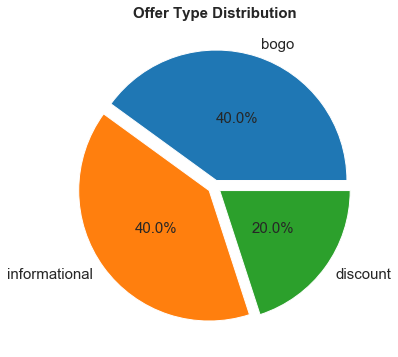

In [145]:
style_pie_1(title='Offer Type Distribution', labels=[*portfolio['offer_type'].dropna().unique()],
            data=portfolio['offer_type'].value_counts())

**`Portfolio Data` Observations:** 
- There are three types of offer including BOGO, information, discount offers
- There are 10 different offers in total. 4 of them are discounts, 4 are BOGO (Buy One Get One Free), and 2 of them are informational (advertisments).
- The `reward` and `difficulty` columns are in USD (US Dollars) units.
- The `duration` column is measured in `days`
- The `channel`, `offer_type`, and `id` columns are categorical
- There are no null values

<a id='2.22'></a>
### 2.22 `Profile` Data EDA

**`Profile` Data Info**

This dataset holds data on the demographics of users on the Starbucks app.

In [146]:
profile.head()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [147]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   id                17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


In [148]:
profile.isnull().sum()

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

In [149]:
# Looking for outliers
profile.describe()

,age,became_member_on,income
count,17000.000000,1.700000e+04,14825.000000
mean,62.531412,2.016703e+07,65404.991568
std,26.738580,1.167750e+04,21598.299410
min,18.000000,2.013073e+07,30000.000000
25%,45.000000,2.016053e+07,49000.000000
50%,58.000000,2.017080e+07,64000.000000
75%,73.000000,2.017123e+07,80000.000000
max,118.000000,2.018073e+07,120000.000000


**`Profile` Age and Income Distribution**

In [150]:
profile[['age', 'income']].mean()

age          62.531412
income    65404.991568
dtype: float64

**`Profile` Age and Income Distribution by Gender**

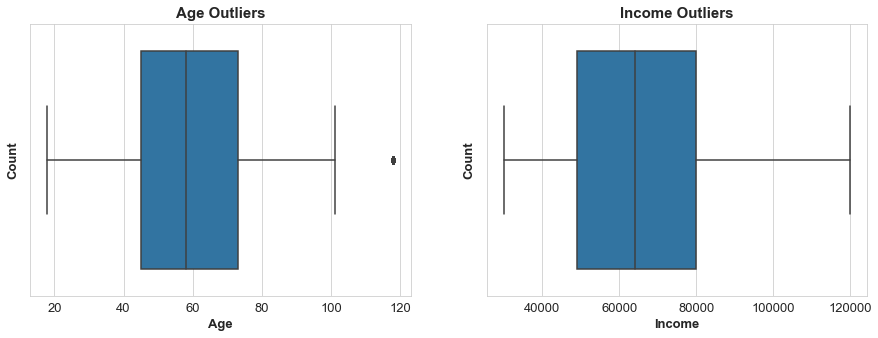

In [151]:
# Looking for age and income outliers in profile using boxplot
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Plots
ax1 = sns.boxplot(ax=axes[0], data=profile, x='age')
ax2 = sns.boxplot(ax=axes[1], data=profile, x='income')

# Style plot
style_sns_2('Age Outliers', 'Income Outliers', 'Age', 'Count', 'Income', 'Count')

**`Profile` Age Groups Distribution**

In [153]:
print('Minimum age:', profile['age'].min())
print('Maximum age:', profile['age'].max())

Minimum age: 18
Maximum age: 118


In [154]:
# Create age groups
age_ranges = profile.drop(columns=['id', 'became_member_on', 'income']).copy()
a = age_ranges['age']
age_ranges['age_group'] = a

# Filter age ranges, then replace income integer with strings
age_ranges.loc[a.between(18, 24), 'age_group'] = '18-24'
age_ranges.loc[a.between(25, 34), 'age_group'] = '25-34'
age_ranges.loc[a.between(35, 44), 'age_group'] = '35-44'
age_ranges.loc[a.between(45, 54), 'age_group'] = '45-54'
age_ranges.loc[a.between(55, 64), 'age_group'] = '55-64'
age_ranges.loc[a.between(65, 74), 'age_group'] = '65-74'
age_ranges.loc[a.between(75, 84), 'age_group'] = '75-84'
age_ranges.loc[a.between(66, 94), 'age_group'] = '85-94'
age_ranges.loc[a.between(95, 104), 'age_group'] = '95-104'
age_ranges.loc[a.between(105, 119), 'age_group'] = '105+'

# Null data age ranges
null_ranges = age_ranges.loc[a.between(105, 118)]

In [155]:
# Formatting data for grouped bar plot
age_ranges = age_ranges.groupby(['age_group', 'gender'])['age'].count().reset_index().rename(columns={'age':'count'})
age_ranges['gender'] = age_ranges['gender'].replace({'F':'Female', 'M':'Male', 'O':'Other'})

In [156]:
age_ranges

,age_group,gender,count
0,18-24,Female,238
1,18-24,Male,629
2,18-24,Other,9
3,25-34,Female,407
4,25-34,Male,955
5,25-34,Other,18
6,35-44,Female,622
7,35-44,Male,1218
8,35-44,Other,29
9,45-54,Female,1247


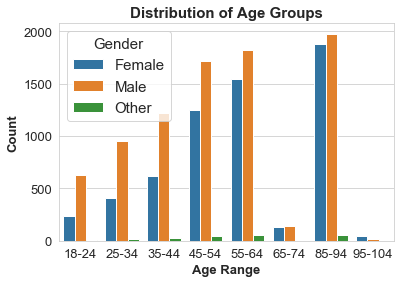

In [157]:
# Plot
sns.barplot(x='age_group', y='count', hue='gender', data=age_ranges).legend(title='Gender')

# Styling
style_sns_1(title='Distribution of Age Groups', xlabel='Age Range', ylabel='Count')

**Note:** None gender ages are omitted from the bar plot due to missing data.

In [158]:
# Sample of age ranges with null gender values
null_ranges.head()

,gender,age,age_group
0,None,118,105+
2,None,118,105+
4,None,118,105+
6,None,118,105+
7,None,118,105+


In [159]:
# Total count of ages over 115
print('Age outlier count:', profile['age'][profile['age'] > 115].count())

# Finding percentage of outliers in age
outliers = profile['age'][profile['age'] > 115].count()
all_age_counts = profile ['age'].count()
print('Age outlier percentage:', round(outliers/all_age_counts*100, 2), '%')

Age outlier count: 2175
Age outlier percentage: 12.79 %


We can see a large number of outliers here in the age column showing around 120 years of age. We could just use the median age to fill their values but the dataset would be imbalanced with most datapoints coming from the median age range. Since we only found 2175 ages over 115, we can safely delete them. We also found a pattern that all ages of 118 have a gender of `none` and income of `NaN`. This suggests to me there is an error with the data being input so it is useless to us even if we decided to impute the values.

**`Profile` Gender Distribution**

In [160]:
profile['gender'].value_counts()

M    8484
F    6129
O     212
Name: gender, dtype: int64

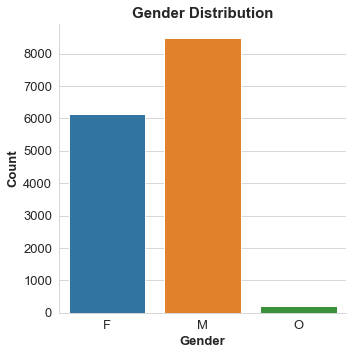

In [161]:
# Gender distribution
sns.catplot(x='gender', kind='count', data=profile)

# Style plot
style_sns_1('Gender Distribution', 'Gender', 'Count')

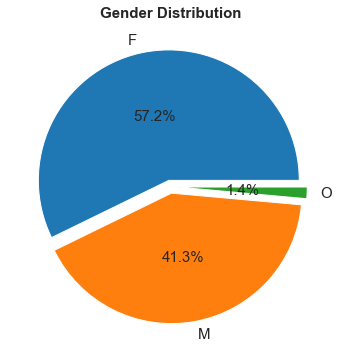

In [162]:
style_pie_1(title='Gender Distribution', labels=[*profile['gender'].dropna().unique()],
            data=profile['gender'].value_counts())

**`Profile` Distribution of when customer became a rewards member**

In [163]:
# Percentage of years users became members on
became_member_on = pd.to_datetime(profile['became_member_on'], format='%Y%m%d')
became_member_year = became_member_on.dt.year.value_counts()
became_member_year *= 100 / became_member_year.sum()
became_member_year

2017    38.052941
2018    24.694118
2016    20.741176
2015    10.764706
2014     4.064706
2013     1.682353
Name: became_member_on, dtype: float64

In [164]:
# Percentage of years users became members on
became_member_on = pd.to_datetime(profile['became_member_on'], format='%Y%m%d')
became_member_month = became_member_on.dt.month.value_counts()
became_member_month *= 100 / became_member_month.sum()
became_member_month

8     9.470588
10    9.223529
12    9.152941
1     8.970588
9     8.911765
11    8.523529
7     7.994118
3     7.817647
4     7.735294
5     7.688235
6     7.441176
2     7.070588
Name: became_member_on, dtype: float64

In [165]:
# Prepare data for bar plot
profile_members = profile[['became_member_on', 'gender']].copy()
profile_members['year'] = pd.to_datetime(profile['became_member_on'], format='%Y%m%d').dt.year
profile_members['gender'] = profile_members['gender'].replace({'F':'Female', 'M':'Male', 'O':'Other'})
member_date = profile_members.groupby(['year','gender']).count().reset_index().iloc[:,:3].rename(
    columns={'became_member_on':'count'})

member_date

,year,gender,count
0,2013,Female,74
1,2013,Male,197
2,2013,Other,3
3,2014,Female,138
4,2014,Male,520
5,2014,Other,4
6,2015,Female,663
7,2015,Male,905
8,2015,Other,29
9,2016,Female,1509


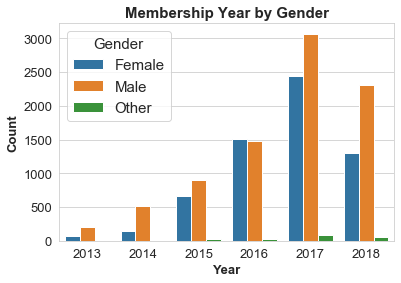

In [166]:
# Plot
sns.barplot(x='year', y='count', hue='gender', data=member_date).legend(title='Gender')

# Styling
style_sns_1(title='Membership Year by Gender', xlabel='Year', ylabel='Count')

**`Profile Data` Observations:** 
- The meadian and mean age of users is around 55 years old
- The maximum age is 118 which is an error, but the minimum age is 18
- Observations with age as 118 seem to be bad data since only the `id` hash is provided
- The income seems to have the most users between 50,000 to 70,000 USD which shows our demographic is mainly older, wealthier individuals
- The maximum income is 120,000 USD, but the minimum is 30,000 USD
- `id` column contains verbose hashes that can be converted to integers to make them easier to navigate
- The hashes should be mapped to the `Transcript` DataFrame since we can match the `id` values
- Females account for 57.2% of the dataset, males account for 41.3% and other only 1.4%. The gender distribution could create some imbalance later

<a id='2.23'></a>
### 2.23 `Transcript` Data EDA

**`Transcript` Data Info**

This dataset holds the transaction data including records for transactions, offers received, offers viewed, and offers completed.

In [167]:
transcript.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [168]:
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  306534 non-null  object
 1   event   306534 non-null  object
 2   value   306534 non-null  object
 3   time    306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


In [169]:
transcript.isnull().sum()

person    0
event     0
value     0
time      0
dtype: int64

In [170]:
transcript['event'].value_counts()

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64

In [171]:
transcript['person'].nunique()

17000

In [172]:
# Exploring the dictionaries
transcript['value'][0]

{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}

In [173]:
type(transcript['value'][0])

dict

In [174]:
transcript['value'][0].keys()

dict_keys(['offer id'])

In [175]:
# Iterate through the keys in value_col and append to list
value_col = transcript['value']
dict_counter = []
for x in value_col:
    try:
        dict_counter.append([*x.keys()]) # *unpacks the dict to reveal each string value
    except:
        dict_counter.extend([*x.keys()]) # if two values or more cause error then extend list

# File name        
file_name = "dict_counter.pkl"

# Save dict as pkl
open_file = open(file_name, "wb")
pickle.dump(dict_counter, open_file)
open_file.close()

In [176]:
# Load dict strings from pkl
open_file = open(file_name, "rb")
loaded_list = pickle.load(open_file)
open_file.close()

In [177]:
# Unique values
loaded = np.array(loaded_list, dtype=object)
np.unique(loaded)

array([list(['amount']), list(['offer id']), list(['offer_id', 'reward'])],
      dtype=object)

**`Transcript Data` Observations:** 
- Found nested dicts in the transcript `value` column from the json which need to be unpacked/flattened to fix the issue
- There are no null values in the dataset
- Categorical columns found are `person`, `value`, `event`

**Note:** Portfolio data looks clean, no changes need to be made at the moment apart from renaming some columns to match the other dataframes.

<a id='2.3'></a>
### 2.3. Assess Data

<blockquote> 
<b>Quality:</b> issues with content. Low quality data is also known as dirty data. <br>
<b>Tidiness:</b> issues with structure that prevent easy analysis. Untidy data is also known as messy data.<br>
    <b>Tidy data requirements:</b>
Each variable forms a column.
Each observation forms a row.
Each type of observational unit forms a table.
</blockquote>

#### 1. Assess `Portfolio`

#### Quality issues

None.

#### Tidiness issues

1. Unpack lists in `channels` column then split categorical columns into dummies then drop their parent columns
2. Rename `id` column to `offer_id`
3. Map each offer hash to in `id` to an integer

#### 2. Assess `Profile`

#### Quality issues

**Note:** These issues should only be addressed after all datasets have been merged in order to retain each `id` hash

1. Missing data such as `None` in `gender` column
2. Missing data such as `NaN` in `income` column
3. Incorrect values such as `118` years old in `age` column

#### Tidiness issues

1. Format `became_member_on` as a datetime object then create `became_member_year` with just the year the user joined
2. Rename `id` column to `user_id`
3. Map each offer hash to in `id` to an integer
4. Split the `income` by quantiles for creating 5 equal income groups as strings
5. Split the `age` by ranges as strings

#### 3. Assess `Transcript`

#### Quality issues

None.

#### Tidiness issues

1. Rename `person` column to `user_id`
2. Unpack dict from `value` column to their own columns then drop `value` column
3. Map each offer hash to in `user_id` and `offer_id` to an integer

<a id='3'></a>
## 3. Data Preparation

To prepare our data we must clean our data then pre-process it in order to build a more accurate model. We also need to pay attention the total numbers of the selected variables. Selecting too few variables may not achieve high accuracy, while selecting too many variables may cause overfitting. In this section, we will select the top numerical variables with a high correlation to our response variable to use for our predictions. Dummy variables will be created for the selected categorical variables with 0, 1 encodings. A number of dummy variables with the highest correlations will be obtained to be used for the initial modeling.

**Reference:** https://towardsdatascience.com/introduction-to-data-preprocessing-in-machine-learning-a9fa83a5dc9d

<a id='3.1'></a>
### 3.1. Clean Data

In [178]:
# Copy dataframes
portfolio_new = portfolio.copy()
profile_new = profile.copy()
transcript_new = transcript.copy()

#### 1. Clean `portfolio_new`

#### Define

1. Unpack lists in `channels` column then split categorical columns into dummies then drop their parent columns
2. Rename `id` column to `offer_id`
3. Map each offer hash to in `id` to an integer

In [179]:
portfolio_new['id'].nunique()

10

#### Code 1

In [180]:
# Unpack list to strings to prepare for dummies
portfolio_new['channels'] = portfolio_new['channels'].str.join(',')

# Use dummies to split at commas
channel_dummies = portfolio_new['channels'].str.get_dummies(',')

# Show dummies
channel_dummies

,email,mobile,social,web
0,1,1,1,0
1,1,1,1,1
2,1,1,0,1
3,1,1,0,1
4,1,0,0,1
5,1,1,1,1
6,1,1,1,1
7,1,1,1,0
8,1,1,1,1
9,1,1,0,1


In [181]:
# Get dummies from offer_type column
offer_dummies = pd.get_dummies(portfolio_new['offer_type'], prefix=None)

In [182]:
# Append dummies to portfolio then drop parent columns
portfolio_new = pd.concat([portfolio_new, offer_dummies], axis=1).drop(columns=['offer_type'])
portfolio_new = pd.concat([portfolio_new, channel_dummies], axis=1).drop(columns=['channels'])

In [183]:
portfolio_new

,reward,difficulty,duration,id,bogo,discount,informational,email,mobile,social,web
0,10,10,7,ae264e3637204a6fb9bb56bc8210ddfd,1,0,0,1,1,1,0
1,10,10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,1,0,0,1,1,1,1
2,0,0,4,3f207df678b143eea3cee63160fa8bed,0,0,1,1,1,0,1
3,5,5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,0,0,1,1,0,1
4,5,20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,1,0,1,0,0,1
5,3,7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,0,1,0,1,1,1,1
6,2,10,10,fafdcd668e3743c1bb461111dcafc2a4,0,1,0,1,1,1,1
7,0,0,3,5a8bc65990b245e5a138643cd4eb9837,0,0,1,1,1,1,0
8,5,5,5,f19421c1d4aa40978ebb69ca19b0e20d,1,0,0,1,1,1,1
9,2,10,7,2906b810c7d4411798c6938adc9daaa5,0,1,0,1,1,0,1


In [184]:
portfolio

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


#### Code 2

In [185]:
# Rename portfolio columns
portfolio_new = portfolio_new.rename(columns={'id':'offer_id'})

#### Code 3

In [186]:
# Store copy for future use as offer_id hash map
portfolio_hash = portfolio_new.copy() 

# Take the unique hashes from offer_id
offer_id = portfolio_new['offer_id'].unique()
offer_id

array(['ae264e3637204a6fb9bb56bc8210ddfd',
       '4d5c57ea9a6940dd891ad53e9dbe8da0',
       '3f207df678b143eea3cee63160fa8bed',
       '9b98b8c7a33c4b65b9aebfe6a799e6d9',
       '0b1e1539f2cc45b7b9fa7c272da2e1d7',
       '2298d6c36e964ae4a3e7e9706d1fb8c2',
       'fafdcd668e3743c1bb461111dcafc2a4',
       '5a8bc65990b245e5a138643cd4eb9837',
       'f19421c1d4aa40978ebb69ca19b0e20d',
       '2906b810c7d4411798c6938adc9daaa5'], dtype=object)

In [187]:
# Add dict to each hash
offer_dict = portfolio_new['offer_id'].to_dict()
offer_dict

{0: 'ae264e3637204a6fb9bb56bc8210ddfd',
 1: '4d5c57ea9a6940dd891ad53e9dbe8da0',
 2: '3f207df678b143eea3cee63160fa8bed',
 3: '9b98b8c7a33c4b65b9aebfe6a799e6d9',
 4: '0b1e1539f2cc45b7b9fa7c272da2e1d7',
 5: '2298d6c36e964ae4a3e7e9706d1fb8c2',
 6: 'fafdcd668e3743c1bb461111dcafc2a4',
 7: '5a8bc65990b245e5a138643cd4eb9837',
 8: 'f19421c1d4aa40978ebb69ca19b0e20d',
 9: '2906b810c7d4411798c6938adc9daaa5'}

In [188]:
# Swap keys and hash values and start dict from 1 instead of 0
offer_dict = dict([(value, key) for key, value in offer_dict.items()])
offer_dict = dict([(key, value +1) for key, value in offer_dict.items()])

offer_dict

{'ae264e3637204a6fb9bb56bc8210ddfd': 1,
 '4d5c57ea9a6940dd891ad53e9dbe8da0': 2,
 '3f207df678b143eea3cee63160fa8bed': 3,
 '9b98b8c7a33c4b65b9aebfe6a799e6d9': 4,
 '0b1e1539f2cc45b7b9fa7c272da2e1d7': 5,
 '2298d6c36e964ae4a3e7e9706d1fb8c2': 6,
 'fafdcd668e3743c1bb461111dcafc2a4': 7,
 '5a8bc65990b245e5a138643cd4eb9837': 8,
 'f19421c1d4aa40978ebb69ca19b0e20d': 9,
 '2906b810c7d4411798c6938adc9daaa5': 10}

In [189]:
# Map keys to hash in portfolio df
portfolio_new['offer_id'] = portfolio_new['offer_id'].map(offer_dict)

In [190]:
# Create a function for future mapping int to dict
def hash_map(df, col):
    '''This function replaces hashes with integers.
    
    INPUT:
    df - dataframe 'variable'
    col - column in dataframe containing the hashes 'string'
    
    
    OUTPUT:
    none.
    '''
    x_id = df[col].unique()
    x_dict = pd.Series(x_id).to_dict()
    x_dict = dict([(value, key) for key, value in x_dict.items()])
    x_dict = dict([(key, value +1) for key, value in x_dict.items()])
    df[col] = df[col].map(x_dict)
    
# Create a function for future mapping int to dict
def hash_map_offer(df_1, col_1, df_2, col_2):
    '''This function replaces hashes with integers.
    
    INPUT:
    df - dataframe 'variable'
    col - column in dataframe containing the hashes 'string'
    var - variable for column
    
    
    OUTPUT:
    none.
    '''
    # Input 1
    x_id = df_1[col_1].unique()
    x_dict = pd.Series(x_id).to_dict()
    x_dict = dict([(value, key) for key, value in x_dict.items()])
    x_dict = dict([(key, value +1) for key, value in x_dict.items()])
    
    # Input 2
    y_id = df_2[col_2].unique()
    y_dict = pd.Series(y_id).to_dict()
    y_dict = dict([(value, key) for key, value in y_dict.items()])
    y_dict = dict([(key, value +1) for key, value in y_dict.items()])
    df_1[col_1] = df_1[col_1].map(y_dict)

In [191]:
portfolio_new

,reward,difficulty,duration,offer_id,bogo,discount,informational,email,mobile,social,web
0,10,10,7,1,1,0,0,1,1,1,0
1,10,10,5,2,1,0,0,1,1,1,1
2,0,0,4,3,0,0,1,1,1,0,1
3,5,5,7,4,1,0,0,1,1,0,1
4,5,20,10,5,0,1,0,1,0,0,1
5,3,7,7,6,0,1,0,1,1,1,1
6,2,10,10,7,0,1,0,1,1,1,1
7,0,0,3,8,0,0,1,1,1,1,0
8,5,5,5,9,1,0,0,1,1,1,1
9,2,10,7,10,0,1,0,1,1,0,1


#### Test

In [192]:
# Sort columns
portfolio_new.insert(0, 'offer_id', portfolio_new.pop('offer_id'))
portfolio_new.insert(3, 'reward', portfolio_new.pop('reward'))

In [193]:
portfolio_new

,offer_id,difficulty,duration,reward,bogo,discount,informational,email,mobile,social,web
0,1,10,7,10,1,0,0,1,1,1,0
1,2,10,5,10,1,0,0,1,1,1,1
2,3,0,4,0,0,0,1,1,1,0,1
3,4,5,7,5,1,0,0,1,1,0,1
4,5,20,10,5,0,1,0,1,0,0,1
5,6,7,7,3,0,1,0,1,1,1,1
6,7,10,10,2,0,1,0,1,1,1,1
7,8,0,3,0,0,0,1,1,1,1,0
8,9,5,5,5,1,0,0,1,1,1,1
9,10,10,7,2,0,1,0,1,1,0,1


#### 2. Clean `profile_new`

#### Define

1. Drop missing data from `profile_new`
2. Format `became_member_on` as a datetime object then create `became_member_year` dummies
3. Rename `id` column to `user_id`
4. Map each offer hash to in `id` to an integer
5. Split the `income` by quantiles for creating 5 equal income groups as strings then get dummies
6. Split the `age` by ranges as strings then get dummies of each
7. Get `gender` dummies
8. Concatenate dummy columns

In [194]:
# Function to move column order
def move_column(df, col, pos):
    '''This function moves the selected column order.
    
    INPUT:
    df - dataframe 'variable'
    col - column in dataframe 'string'
    pos - index position to place col in dataframe 'integer'
    
    OUTPUT:
    none.
    '''
    df.insert(pos, col, df.pop(col))

#### Code 1

In [195]:
# Drop all missing data
profile_new = profile_new.dropna()

#### Code 2

In [196]:
# Convert became_member_on to datatime year object
profile_new['became_member_year'] = pd.to_datetime(profile_new['became_member_on'], format='%Y%m%d').dt.year

# Get dummies of member year
year_dummies = pd.get_dummies(profile_new['became_member_year'])

In [197]:
# Create memeber_time column
profile_new['member_days'] = pd.to_datetime(profile_new['became_member_on'], format='%Y%m%d')
profile_new['member_days'] = (datetime.now() - profile_new['member_days']).dt.days

**Reference:** https://www.geeksforgeeks.org/how-to-move-a-column-to-first-position-in-pandas-dataframe/

In [198]:
# Drop dummy parent columns
profile_new.drop(columns=['became_member_on', 'became_member_year'], inplace=True)

#### Code 3

In [199]:
# Rename portfolio columns
profile_new = profile_new.rename(columns={'id':'user_id'})

#### Code 4

In [200]:
# Using hash_map function to turn hashes into integers
hash_map(profile_new, 'user_id')

#### Code 5

In [201]:
# Split the income bands by quantiles for creating 5 equal income groups
bins = []
group_names = ['income_1', 'income_2', 'income_3', 'income_4', 'income_5']

for i in range(0, 12, 2):
    
    # Create 5 equal income groups using quantiles
    bin_values = profile_new['income'].quantile(q=[i/10]).values[0]
    bins.append(bin_values)
    
# Create column with groups    
profile_new['income_group'] = pd.cut(profile_new['income'], bins, labels=group_names)

In [202]:
# Change dtype from float to int as there are no null rows now
profile_new['income'] = profile_new['income'].astype(int)

# Income group dummies
income_dummies = pd.get_dummies(profile_new['income_group'], prefix=None)
profile_new = pd.concat([profile_new, income_dummies], axis=1).drop(columns=['income_group'])

**Reference:** https://pandas.pydata.org/docs/reference/api/pandas.cut.html

#### Code 6

In [203]:
# Create age groups
bins = [18, 24, 25, 34, 35, 44, 45, 54, 55, 
        64, 65, 74, 75, 84, 85, 94, 95, 104]

# Add age 18 to simplify looping
bin_edges = [bins[0]] 
group_names = []

# Skip every 2 in list using step
for i in range(0, len(bins)-1, 2):
    
    # Index bins and convert to string for labels
    names = str(bins[i]) + '_' + str(bins[i+1])
    group_names.append(names)
    
    # Age values to cut (+1 to skip age 18)
    bin_edges.append(bins[i+1])

# Create column with groups
profile_new['age_group'] = pd.cut(profile_new['age'], bins=bin_edges, labels=group_names)

# Turn age_group into dummies then sort columns by ages
age_dummies = pd.get_dummies(profile_new['age_group'], prefix=None)
age_dummies.head()

,18_24,25_34,35_44,45_54,55_64,65_74,75_84,85_94,95_104
1,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,1,0,0
5,0,0,0,0,0,1,0,0,0
8,0,0,0,0,0,1,0,0,0
12,0,0,0,0,1,0,0,0,0


In [204]:
# Join age dummies to profile
profile_age = profile_new[['user_id', 'age']].copy()
profile_new = pd.concat([profile_new, age_dummies], axis=1).drop(columns=['age', 'age_group'])

In [205]:
profile.head()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [206]:
profile_new.head()

,gender,user_id,income,member_days,income_1,income_2,income_3,income_4,income_5,18_24,25_34,35_44,45_54,55_64,65_74,75_84,85_94,95_104
1,F,1,112000,1510,0,0,0,0,1,0,0,0,0,1,0,0,0,0
3,F,2,100000,1577,0,0,0,0,1,0,0,0,0,0,0,1,0,0
5,M,3,70000,1225,0,0,1,0,0,0,0,0,0,0,1,0,0,0
8,M,4,53000,1301,0,1,0,0,0,0,0,0,0,0,1,0,0,0
12,M,5,51000,1391,0,1,0,0,0,0,0,0,0,1,0,0,0,0


#### Code 7

In [207]:
# Create gender dummies
gender_dummies = pd.get_dummies(profile_new['gender'], prefix=None)
gender_dummies = gender_dummies.rename(columns={
    'F':'female', 'M':'male', 'O':'other'})

# Join dummies to profile
profile_new = pd.concat([profile_new, gender_dummies], axis=1).drop(columns=['gender'])

gender_dummies.head()

,female,male,other
1,1,0,0
3,1,0,0
5,0,1,0
8,0,1,0
12,0,1,0


In [208]:
# Move gender column to start of index
move_column(profile_new, 'female', 1) 
move_column(profile_new, 'male', 2) 
move_column(profile_new, 'other', 3); 

#### Code 8

In [209]:
# Concatenate other dummy columns
profile_new = pd.concat([profile_new, year_dummies], axis=1)

#### Test

In [210]:
# Move member_days column
move_col = profile_new.pop('member_days')
profile_new.insert(4, 'member_days', move_col)

In [211]:
profile_new.head()

,user_id,female,male,other,member_days,income,income_1,income_2,income_3,income_4,income_5,18_24,25_34,35_44,45_54,55_64,65_74,75_84,85_94,95_104,2013,2014,2015,2016,2017,2018
1,1,1,0,0,1510,112000,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,2,1,0,0,1577,100000,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
5,3,0,1,0,1225,70000,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
8,4,0,1,0,1301,53000,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
12,5,0,1,0,1391,51000,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


**Reference:** https://www.geeksforgeeks.org/how-to-move-a-column-to-first-position-in-pandas-dataframe/

#### 3. Clean `transcript_new`

#### Define

1. Rename `person` column to `user_id`
2. Convert time from hours to days
3. Unpack dict from `value` column to their own columns then drop `value` column
4. Map each offer hash to in `user_id` and `offer_id` to an integer
5. Create `transaction` df by filtering only `user_id` values in `transcript` and `profile` df
    1. Drop null `offer_id` values and remove all columns apart from `user_id`, `time`, and `amount`
6. Create `offer_data` df by using dropna `offer_id` then drop columns `transaction`, `amount`

#### Code 1

In [212]:
# Rename transcript columns
transcript_new = transcript_new.rename(columns={'person':'user_id'})

#### Code 2

In [213]:
# Convert time into days (np.floor can accept arrays)
transcript_new['time'] = np.floor(transcript_new['time'] / 24).astype(int)

#### Code 3

In [214]:
# Extract dict from value column rows in their own columns
transcript_new['offer_id'] = [[*i.values()][0]if [*i.keys()][0] in ['offer id','offer_id'] else np.nan for i in transcript_new.value]
transcript_new['amount'] = [[*i.values()][0]if [*i.keys()][0] in ['amount','amount'] else np.nan for i in transcript_new.value]

# Drop value column
transcript_new = transcript_new.drop(columns=['value'])

#### Code 4

In [215]:
# Using hash_map function to turn hashes of user and offer_ids into integers
hash_map(transcript_new, 'user_id')
hash_map_offer(transcript_new, 'offer_id', portfolio_hash, 'offer_id')

#### Code 5

In [216]:
# Filter user_ids in (customer) profile df
user_count = transcript_new['user_id'].count()
transcript_new = transcript_new[transcript_new['user_id'].isin(profile_new['user_id'])]

# Print user counts before and after operation
print('User count before:', user_count)
print('User count after:', transcript_new['user_id'].count())

User count before: 306534
User count after: 275506


In [217]:
# Create transaction df from transcript
transaction = transcript_new[transcript_new['offer_id'].isna()]
transaction = transaction[['user_id', 'time', 'amount']]

In [218]:
# Get evemt dummies
event_dummies = pd.get_dummies(transcript_new['event'])

# Remove 'offer_' from column name
event_dummies.columns = [col.replace('offer ', '') for col in event_dummies.columns] 

# Join dummies to profile
transcript_new = pd.concat([transcript_new, event_dummies], axis=1).drop(columns=['event'])

event_dummies.head()

,completed,received,viewed,transaction
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


#### Code 6

In [219]:
# Create offer data df
offer_data = transcript_new.dropna(subset=['offer_id'],axis=0).drop(columns=['transaction', 'amount'])
offer_data['offer_id'] = offer_data['offer_id'].astype(int)

#### Test

In [220]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125792 entries, 12654 to 306533
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  125792 non-null  int64  
 1   time     125792 non-null  int32  
 2   amount   125792 non-null  float64
dtypes: float64(1), int32(1), int64(1)
memory usage: 3.4 MB


In [221]:
offer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149714 entries, 0 to 306527
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    149714 non-null  int64
 1   time       149714 non-null  int32
 2   offer_id   149714 non-null  int32
 3   completed  149714 non-null  uint8
 4   received   149714 non-null  uint8
 5   viewed     149714 non-null  uint8
dtypes: int32(2), int64(1), uint8(3)
memory usage: 3.9 MB


In [222]:
offer_data.head()

,user_id,time,offer_id,completed,received,viewed
0,1,0,4,0,1,0
1,2,0,5,0,1,0
2,3,0,10,0,1,0
3,4,0,7,0,1,0
4,5,0,2,0,1,0


In [223]:
offer_data.tail()

,user_id,time,offer_id,completed,received,viewed
306490,12315,29,3,0,0,1
306506,12467,29,7,1,0,0
306507,12468,29,5,0,0,1
306509,12470,29,7,1,0,0
306527,14767,29,7,1,0,0


In [224]:
transaction.head()

,user_id,time,amount
12654,28,0,0.83
12657,37,0,34.56
12659,12651,0,13.23
12670,6658,0,19.51
12671,108,0,18.97


In [225]:
# Count each offer event
event_count = transcript['event'].value_counts()
event_count = pd.DataFrame(event_count).rename(columns={'event':'count'})
event_count

,count
transaction,138953
offer received,76277
offer viewed,57725
offer completed,33579


<a id='3.2'></a>
### 3.2. Integrating

It is time to merge all the DataFrames into one large DataFrame. A warning though, I have included a script which checks the data folder for a csv document of the `clean_data.csv` file so that it skips creating a new csv each time the notebook is restarted. This can be a problem if we want to see new changes reflected so we have to remember to delete the csv and restart the notebook again to have the changes saved. The `clean_data.csv` file takes aproximately 3 minutes to be created for me but it varies depending on the hardware used.

#### Create `df`

In [226]:
def create_offer_df(portfolio, profile, transaction, offer_data):
    ''' This function creates a DataFrame from:
    1. portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
    2. profile.json - demographic data for each customer
    3. transcript.json - records for transactions, offers received, offers viewed, and offers completed
    
    INPUT:
    portfolio - containing offer ids and meta data about each offer (duration, type, etc.)
    profile - demographic data for each customer
    transaction - records for transactions completed
    offer_data - records offers received, offers viewed, and offers completed

    OUTPUT:
    clean_data - Combined DataFrame showing the success of each offer'''
    
    # Init empty array
    clean_data = []
    
    # List each user id
    user_id_list = offer_data['user_id'].unique()

    # Loop
    for idx in tqdm(range(len(user_id_list))):
        clean_data.extend(combine_data(user_id_list[idx],
                                        portfolio_new,
                                        profile_new,
                                        offer_data,
                                        transaction))    
    
    # Create dataframe
    clean_data = pd.DataFrame(clean_data).sort_values('time')
    return clean_data.reset_index(drop=True)

In [227]:
def combine_data(user_id, portfolio, profile, offer_data, transaction):
    ''' The function creates a list of dictionaries describing the success of offers
    sent to each customer
    
    INPUT:
    user_id - customer user id (integer)
    portfolio - containing offer ids and meta data about each offer (duration, type, etc.)
    profile - demographic data for each customer
    transaction - records for transactions completed
    offer_data - records offers viewed, offers viewed, and offers completed
    
    OUTPUT:
    rows - a list of dictionaries describing the success of offers sent to each 
    customer '''
    
    # Filter a specific user
    get_user = profile[profile['user_id'] == user_id]
    
    # Filter offer data for a specific user
    get_offer_data = offer_data['user_id'] == user_id
    user_offer_data = offer_data[get_offer_data]
    user_offer_data = user_offer_data \
    .drop(columns='user_id').reset_index(drop=True)
    
    # Filter transaction data for a specific user
    get_transaction = transaction['user_id'] == user_id
    user_transaction_data = transaction[get_transaction]
    user_transaction_data = user_transaction_data \
    .drop(columns='user_id').reset_index(drop=True)
    
    
    # Create DataFrames for when a customer receives, views, and completes an offer
    event_cols = ['received', 'viewed', 'completed']
    
    # Received offers
    offer_received = user_offer_data[user_offer_data['received'] == 1]
    offer_received = offer_received.drop(columns=event_cols).reset_index(drop=True)
    
    # Viewed offers
    offer_viewed = user_offer_data[user_offer_data['viewed'] == 1]
    offer_viewed = offer_viewed.drop(columns=event_cols).reset_index(drop=True)
    
    # Completed offers
    offer_completed = user_offer_data[user_offer_data['completed'] == 1]
    offer_completed = offer_completed.drop(columns=event_cols).reset_index(drop=True)
    
    # Iterate over each offer a customer receives
    rows = []
    for idx in range(offer_received.shape[0]):
    
        # Filter current offer id
        get_offer_id = offer_received.iloc[idx]['offer_id']

        # Filter portfolio data for current offer
        get_offer = portfolio.loc[portfolio['offer_id'] == get_offer_id]
        duration = get_offer['duration'].values[0]
        
        # Init time the offer is valid
        get_offer_startime = offer_received.iloc[idx]['time']
        get_offer_endtime = offer_received.iloc[idx]['time'] + duration
        
        # Init boolean array to get transactions within the valid offer time window
        get_transaction = np.logical_and(user_transaction_data['time'] >=
                                         get_offer_startime,
                                         user_transaction_data['time'] <=
                                         get_offer_endtime)
         
        # Init boolean array to find when user completes an offer
        get_offer_completed = np.logical_and(offer_completed['time'] >= get_offer_startime,
                                             offer_completed['time'] <= get_offer_endtime)
        
        # Init boolean array to find when user views an offer
        get_offer_viewed = np.logical_and(offer_viewed['time'] >= get_offer_startime,
                                          offer_viewed['time'] <= get_offer_endtime)
        
        # Find out if current offer was successful
        get_offer_successful = get_offer_completed.sum() > 0 and get_offer_viewed.sum() > 0
        
        # Get customer transactions occuring within the valid offer time window
        get_offer_transactions = user_transaction_data[get_transaction]
        
        # Init dictionary for description of current customer offer
        user_row = {'user_id': user_id,
                    'offer_id': get_offer_id,
                    'time': get_offer_startime,
                    'offer_successful': int(get_offer_successful),
                    'total_amount': get_offer_transactions['amount'].sum()}
        
        # Create dict from 'user_row'
        user_row.update(get_offer.iloc[0,1:].to_dict())
        user_row.update(get_user.iloc[0,1:].to_dict())
        
        # Append 'user_row' to 'rows' list
        rows.append(user_row)
        
    return rows

In [228]:
# Create merged df
clean_data_csvfile = "clean_data.csv"

# Check if csv file already exists. If not, create csv from function.
if os.path.exists(clean_data_csvfile):
    clean_data = pd.read_csv(clean_data_csvfile)
else:
    clean_data = create_offer_df(portfolio_new, profile_new, transaction, offer_data)

    clean_data.to_csv(clean_data_csvfile, index=False)
    
clean_data.head()

,user_id,offer_id,time,offer_successful,total_amount,difficulty,duration,reward,bogo,discount,informational,email,mobile,social,web,female,male,other,member_days,income,income_1,income_2,income_3,income_4,income_5,18_24,25_34,35_44,45_54,55_64,65_74,75_84,85_94,95_104,2013,2014,2015,2016,2017,2018
0,1,4,0,1,37.67,5,7,5,1,0,0,1,1,0,1,1,0,0,1510,112000,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,8041,8,0,0,0.00,0,3,0,0,0,1,1,1,1,0,1,0,0,2724,62000,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,8040,8,0,0,32.90,0,3,0,0,0,1,1,1,1,0,0,1,0,1169,66000,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,2593,5,0,0,0.00,20,10,5,0,1,0,1,0,0,1,1,0,0,1192,50000,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,8039,8,0,0,0.00,0,3,0,0,0,1,1,1,1,0,0,1,0,1310,94000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [229]:
 clean_data.to_csv("clean_data.csv", index=False)

In [230]:
clean_data.head()

,user_id,offer_id,time,offer_successful,total_amount,difficulty,duration,reward,bogo,discount,informational,email,mobile,social,web,female,male,other,member_days,income,income_1,income_2,income_3,income_4,income_5,18_24,25_34,35_44,45_54,55_64,65_74,75_84,85_94,95_104,2013,2014,2015,2016,2017,2018
0,1,4,0,1,37.67,5,7,5,1,0,0,1,1,0,1,1,0,0,1510,112000,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,8041,8,0,0,0.00,0,3,0,0,0,1,1,1,1,0,1,0,0,2724,62000,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,8040,8,0,0,32.90,0,3,0,0,0,1,1,1,1,0,0,1,0,1169,66000,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,2593,5,0,0,0.00,20,10,5,0,1,0,1,0,0,1,1,0,0,1192,50000,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,8039,8,0,0,0.00,0,3,0,0,0,1,1,1,1,0,0,1,0,1310,94000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [231]:
# Create a verbose version of clean_data with age, etc
clean_verbose = pd.merge(left=clean_data.copy(), right=profile_age, on='user_id') # Insert age
# Drop columns
clean_data = clean_data.drop(columns=['time',
                                      'user_id',
                                      'email',
                                      'informational',
                                      'member_days'])

column_ordering = ['offer_id', 'total_amount']
column_ordering.extend([elem for elem in clean_data.columns if elem not in column_ordering])
clean_data = clean_data[column_ordering]

In [232]:
clean_verbose.head()

,user_id,offer_id,time,offer_successful,total_amount,difficulty,duration,reward,bogo,discount,informational,email,mobile,social,web,female,male,other,member_days,income,income_1,income_2,income_3,income_4,income_5,18_24,25_34,35_44,45_54,55_64,65_74,75_84,85_94,95_104,2013,2014,2015,2016,2017,2018,age
0,1,4,0,1,37.67,5,7,5,1,0,0,1,1,0,1,1,0,0,1510,112000,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,55
1,1,8,7,0,49.39,0,3,0,0,0,1,1,1,1,0,1,0,0,1510,112000,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,55
2,1,1,17,1,48.28,10,7,10,1,0,0,1,1,1,0,1,0,0,1510,112000,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,55
3,1,9,21,1,48.28,5,5,5,1,0,0,1,1,1,1,1,0,0,1510,112000,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,55
4,8041,8,0,0,0.00,0,3,0,0,0,1,1,1,1,0,1,0,0,2724,62000,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,51


In [233]:
clean_data.head()

,offer_id,total_amount,offer_successful,difficulty,duration,reward,bogo,discount,mobile,social,web,female,male,other,income,income_1,income_2,income_3,income_4,income_5,18_24,25_34,35_44,45_54,55_64,65_74,75_84,85_94,95_104,2013,2014,2015,2016,2017,2018
0,4,37.67,1,5,7,5,1,0,1,0,1,1,0,0,112000,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,8,0.00,0,0,3,0,0,0,1,1,0,1,0,0,62000,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,8,32.90,0,0,3,0,0,0,1,1,0,0,1,0,66000,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,5,0.00,0,20,10,5,0,1,0,0,1,1,0,0,50000,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,8,0.00,0,0,3,0,0,0,1,1,0,0,1,0,94000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


This dataframe has users that did not view the offer but still completed the offer unintentionally. This information will cause our results to be skewed as they were not influenced by the offer so we will remove them from our dataset. We only want users that viewed the offer.

<a id='3.3'></a>
### 3.3. Numerical variable analysis

A numerical variable is a data variable that takes on any value within a finite or infinite interval (e.g. length, test scores, etc.). A numerical variable can also be called a continuous variable because it exhibits the features of continuous data. Unlike discrete data, continuous data takes on both finite and infinite values.

In [234]:
# Filter columns to take numerical variable col names
num = clean_data.copy()
num_cols = num.select_dtypes(include='number').mean() >= 0
num_cols = num_cols[num_cols == True].dropna()
num_cols = num_cols.index.tolist()

In [235]:
# Select numerical variables to use for our model
drop_cols = ['offer_id']
num = num[num_cols].drop(columns=drop_cols)

# Move offer_successful to start of df
num = num[['offer_successful'] + [col for col in num.columns if col != 'offer_successful']]

**Reference:** https://stackoverflow.com/questions/35321812/move-column-in-pandas-dataframe

#### Heatmap

In this step, we need to visualise correlations between the numerical variables. The correlation between the variables should be ordered in descending order and the darkness of the colour indicates whether the effect of price is positive or negative.

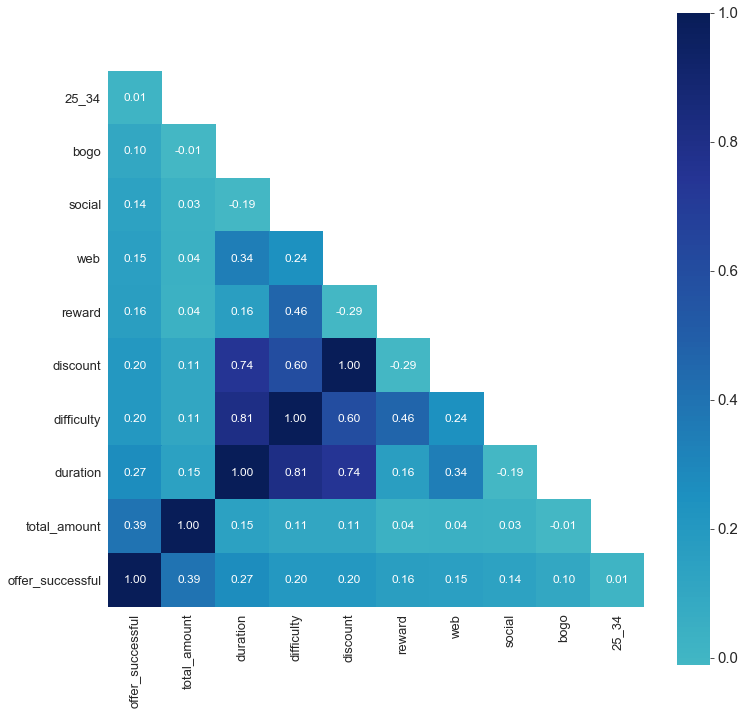

In [236]:
# Heatmap
corr = num.corr().sort_values('offer_successful', axis=1, ascending=False). \
       sort_values('offer_successful', axis=0, ascending=False).iloc[:10,:10]
corr = corr.sort_values('offer_successful', axis=0, ascending=True)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, k=1)] = True

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 12))
    ax = sns.heatmap(corr, mask=mask, vmin=corr.total_amount.min(), 
                     vmax=corr.drop(['offer_successful'], axis=0).total_amount.max(), center=0, 
                     square=True, annot=True, fmt='.2f',cmap='YlGnBu',annot_kws={"size": 12})

# Increase tick label size
ax.tick_params(labelsize=13)

**Observations:** Numerical variables show similarly high correlations such as:
- `total_amount`, `duration`, `difficulty`

Other numerical variables show a less positive correlation to `total_amount` spent such as:
- `social`, `bogo`, `25_34`

**Reference:** https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/

<a id='4'></a>
## 4. Modelling

The first step in a Modelling process is to split our data into training and testing data. Generally, the rule of thumb is to divide the data in a way that variance is not too high with either training or testing data. However, 80/20 is a good starting point to start tweaking from.

**Reference:** https://stackoverflow.com/questions/13610074/is-there-a-rule-of-thumb-for-how-to-divide-a-dataset-into-training-and-validatio

<a id='4.1'></a>
### 4.1. Pre-processing

**We will split our data into training and testing sets by using these variables:**

**`X_train`** - includes the independent variables used to train the model. Since we have also specified the test_size = 0.2, this means 80% of observations from the complete dataset will be used to train/fit the model. The remaining 20% will be used to test the model.

**`X_test`** - the remaining 20% portion of the independent variables from the dataset which will not be used in the training phase and will be used to make predictions to test the accuracy of the model.

**`y_train`** - includes a dependent variable which needs to be predicted by the model. This will include category labels against our independent variables, but we need to specify our dependent variable while training/fitting the model.

**`y_test`** - includes category labels for our test data, these labels will be used to test the accuracy between actual and predicted categories.

**References:** 
1. https://scikit-learn.org/stable/modules/preprocessing.html
2. https://realpython.com/train-test-split-python-data/
3. https://stackoverflow.com/questions/56212429/how-to-remerge-the-x-test-and-the-y-test-the-x-train-and-the-y-train-after-spl
4. https://www.geeksforgeeks.org/python-pandas-series-ravel/
5. https://www.youtube.com/watch?v=5bHpPQ6_OU4&ab_channel=Simplilearn

In [237]:
# Dependent variable name string
class_label_name = 'offer_successful'

# Dependent variable
label = clean_data.filter([class_label_name])

# Independent variables
variables = clean_data.drop(columns=[class_label_name])

# Create a random_state to produce consistent testing results
random_state = 42

# Restore features
features = variables.iloc[:,2:] 

# Removes features
drop = ['reward', 'bogo', 'discount', 
        'mobile', 'social', 'web']

# Drop or retain columns using this loop to test features
for drops in drop:
    features = features.drop(drops, axis=1)

#### Feature Selection

In [238]:
variables.columns[2:]

Index(['difficulty', 'duration', 'reward', 'bogo', 'discount', 'mobile',
       'social', 'web', 'female', 'male', 'other', 'income', 'income_1',
       'income_2', 'income_3', 'income_4', 'income_5', '18_24', '25_34',
       '35_44', '45_54', '55_64', '65_74', '75_84', '85_94', '95_104', '2013',
       '2014', '2015', '2016', '2017', '2018'],
      dtype='object')

In [239]:
# Independent variables
features.columns

Index(['difficulty', 'duration', 'female', 'male', 'other', 'income',
       'income_1', 'income_2', 'income_3', 'income_4', 'income_5', '18_24',
       '25_34', '35_44', '45_54', '55_64', '65_74', '75_84', '85_94', '95_104',
       '2013', '2014', '2015', '2016', '2017', '2018'],
      dtype='object')

In [241]:
# Count features
original_features = variables.columns[2:]
current_features = features.columns
print(style.BOLD + 'Original feature count:', len(original_features), style.END)
print(original_features, '\n')
print(style.BOLD + 'Current features count:', len(current_features), style.END)
print(current_features)

Original feature count: 32 
Index(['difficulty', 'duration', 'reward', 'bogo', 'discount', 'mobile',
       'social', 'web', 'female', 'male', 'other', 'income', 'income_1',
       'income_2', 'income_3', 'income_4', 'income_5', '18_24', '25_34',
       '35_44', '45_54', '55_64', '65_74', '75_84', '85_94', '95_104', '2013',
       '2014', '2015', '2016', '2017', '2018'],
      dtype='object') 

Current features count: 26 
Index(['difficulty', 'duration', 'female', 'male', 'other', 'income',
       'income_1', 'income_2', 'income_3', 'income_4', 'income_5', '18_24',
       '25_34', '35_44', '45_54', '55_64', '65_74', '75_84', '85_94', '95_104',
       '2013', '2014', '2015', '2016', '2017', '2018'],
      dtype='object')


#### Split data into random train and test subsets

In [ ]:
# Split data into random train and test subsets
X_train, X_test, y_train, y_test = train_test_split(variables.values,
                                                    label.values,
                                                    test_size=0.4,
                                                    train_size=0.6,
                                                    random_state=random_state)

In [ ]:
# Return y_train array
y_train

In [ ]:
# Ravel y_train and y_test to one-dimentional array
y_train = y_train.ravel()
y_test = y_test.ravel()

# Return the flattened array
y_train

In [ ]:
# Filter `offer_id` and `total_amount` from columns
variable_names = variables.columns[2:]

# Modify train variables
offer_id_train = X_train[:, 0]
total_amount_train = X_train[:, 1]
X_train = X_train[:, 2:].astype('float64')

# Modify test variables
offer_id_test = X_test[:, 0]
total_amount_test = X_test[:, 1]
X_test = X_test[:, 2:].astype('float64')

# Create X,y variables by merging train and test data
X = np.r_[X_train, X_test]
y = np.r_[y_train, y_test]

In [ ]:
X_train.shape

**References:** 
1. https://www.geeksforgeeks.org/python-pandas-series-ravel/
2. https://numpy.org/doc/stable/reference/generated/numpy.r_.html

In [242]:
# Create a DataFrame for training customer data
train_offer = pd.DataFrame(offer_id_train, columns=['offer_id'])
train_variables = pd.DataFrame(X_train, columns=variable_names)
train_labels = pd.DataFrame(y_train, columns=[class_label_name])

training_data = pd.concat([train_offer,
                           train_variables,
                           train_labels], axis=1)

training_data = training_data.drop(columns=['difficulty',
                                            'duration',
                                            'reward',
                                            'bogo',
                                            'discount',
                                            'mobile',
                                            'social',
                                            'web'])

# Create a verbose version of clean_data with age, etc
training_data_verbose = pd.merge(left=training_data.copy(), right=clean_verbose)

# Print
training_data.head()

NameError: name 'offer_id_train' is not defined

<a id='4.2'></a>
### 4.2. Designing Tests

The test in this task is the test that we will use to determine how well our model works. It may be as simple as splitting our data into a group of cases for model training and another group for model testing. Training data is used to fit mathematical forms to the data model, and test data is used during the model-training process to avoid overfitting: making a model that’s perfect for one dataset, but no other. We can also use holdout data, data that is not used during the model-training process, for an additional test. The deliverable for this task is our test design. It may not be elaborate, but
we must make our training and test data are similar and avoid introducing any bias into the data.

<a id='4.21'></a>
### 4.21. Feature Scaling

In [281]:
# Split data into random train and test subsets
X_train, X_test, y_train, y_test = train_test_split(variables.values,
                                                    label.values,
                                                    test_size=0.2,
                                                    train_size=0.8,
                                                    random_state=random_state)

y_train = y_train.ravel()
y_test = y_test.ravel()
# Variables to scale
scale_variables = ['difficulty', 'duration', 'reward', 'income']
variable_names = variables.columns[2:]
min_max_scaler = {}

# for idx in range(len(scale_variables)):
#     # Filter variables by using their names
#     column_idx = np.argwhere(variable_names == scale_variables[idx])[0, 0]
    
#     # Define new variable
#     column = scale_variables[idx]
    
#     # Scale selected column
#     min_max_scaler[column] = MinMaxScaler()
#     min_max_scaler[column].fit(X_train[:, column_idx].reshape(-1, 1))

#     # Scale values for X_train
#     transformed_values = min_max_scaler[column].transform(
#                          X_train[:, column_idx].reshape(-1, 1))

#     # Transform X_train
#     X_train[:, column_idx] = transformed_values.reshape(1, -1)
    
#     # Scale values for X_test
#     transformed_values = min_max_scaler[column].transform(
#                          X_test[:, column_idx].reshape(-1, 1))
    
#     # Transform X_test
#     X_test[:, column_idx] = transformed_values.reshape(1, -1)

<a id='4.3'></a>
### 4.3. Building models

#### Finding the best model

To find the best model I've prepared a function below which takes a selection of models that might work well with the dataset. The function will test each of the models and return the accuracy, precision, recall, f1-score and support per model. We are going to test fit 5 different models on our dataset. The models chosen are:

1. Logistic Regression: basic linear classifier (a good baseline model)
2. Random Forest: ensemble bagging classifier
3. K-Nearest Neighbors: instance based classifier
4. Gaussian Naive Bayes: probabilistic classifier
5. XGBoost: ensemble (extreme!) boosting classifier

I have omitted SVM because it had one of the worst performing models and was slow to train/score. For the initial experiements, I used the default parameters for each model. To get better results for the fit of each model, we'll need to fine tune the parameters later. 

**Choosing the Right Algorithm:** 
1. https://www.dummies.com/programming/big-data/data-science/choosing-right-algorithm-machine-learning/
2. https://medium.com/quick-code/regression-versus-classification-machine-learning-whats-the-difference-345c56dd15f7

In [288]:
def run_exps(X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame) -> pd.DataFrame:
    '''
    Lightweight script to test many models and find winners
    :param X_train: training split
    :param y_train: training target vector
    :param X_test: test split
    :param y_test: test target vector
    :return: DataFrame of predictions
    '''
    
    dfs = [] 
    
    # Contains tuple of name and classifier or 'clf'
    models = [
              ('LogReg', LogisticRegression(max_iter=500)), # Stop iteration error
               ('RF', RandomForestClassifier())#,
#               ('KNN', KNeighborsClassifier()),
#               # Takes time to fit with similar perf to LogReg ('SVM', SVC()), 
#               ('GNB', GaussianNB()),
               #('XGB', XGBClassifier(use_label_encoder=False, # Fix depreciation
 #                                    eval_metric='mlogloss')) 
            ]
    results = []
    names = []
    scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
    target_names = ['not success', 'success']
    
    for name, model in models:
            kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=random_state)
            cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
            clf = model.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            print(name)
            print(classification_report(y_test, y_pred,target_names=target_names))
            print(confusion_matrix(y_test,y_pred))
            results.append(cv_results)
            names.append(name)
            this_df = pd.DataFrame(cv_results)
            this_df['model'] = name
            dfs.append(this_df)
    final = pd.concat(dfs, ignore_index=True)
    return final

In [290]:
final = run_exps(X_train, y_train, X_test, y_test)
final

LogReg
              precision    recall  f1-score   support

 not success       0.79      0.88      0.83      7561
     success       0.82      0.71      0.76      6062

    accuracy                           0.80     13623
   macro avg       0.81      0.80      0.80     13623
weighted avg       0.81      0.80      0.80     13623

[[6627  934]
 [1733 4329]]
RF
              precision    recall  f1-score   support

 not success       0.91      0.90      0.91      7561
     success       0.88      0.89      0.88      6062

    accuracy                           0.90     13623
   macro avg       0.89      0.90      0.89     13623
weighted avg       0.90      0.90      0.90     13623

[[6839  722]
 [ 693 5369]]


,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted,test_roc_auc,model
0,0.191492,0.022937,0.807689,0.809010,0.807689,0.806105,0.886901,LogReg
1,0.211441,0.027924,0.808973,0.811340,0.808973,0.807144,0.887614,LogReg
2,0.204457,0.022935,0.802441,0.803650,0.802441,0.800708,0.881537,LogReg
3,0.193487,0.021942,0.810699,0.812983,0.810699,0.808905,0.891669,LogReg
4,0.184512,0.029916,0.804735,0.805806,0.804735,0.802860,0.883504,LogReg
5,4.819176,0.517622,0.897881,0.898205,0.897881,0.897968,0.957795,RF
6,5.160280,0.529583,0.896321,0.896428,0.896321,0.896359,0.956397,RF
7,5.308875,0.516628,0.897504,0.897665,0.897504,0.897560,0.955541,RF
8,6.009013,0.596414,0.896862,0.896869,0.896862,0.896866,0.956498,RF
9,5.531040,0.549539,0.895485,0.895726,0.895485,0.895565,0.956777,RF


To complete our analysis, we need to analyze the data in the `final` dataframe returned from the run_exps() script.
To obtain better estimates of the distribution of metrics from each model, we need to run empirical bootstrapping at 30 samples using the code below. Additionally, we should partition the data into two groups: 
- performance metrics
- fit-time metrics. 

#### Evaluating the results

In [291]:
bootstraps = []
for model in list(set(final.model.values)):
    model_df = final.loc[final.model == model]
    bootstrap = model_df.sample(n=30, replace=True)
    bootstraps.append(bootstrap)
        
bootstrap_df = pd.concat(bootstraps, ignore_index=True)
results_long = pd.melt(bootstrap_df,id_vars=['model'],var_name='metrics', value_name='values')
time_metrics = ['fit_time','score_time'] # fit time metrics

# Performance Metrics
results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)] # get df without fit data
results_long_nofit = results_long_nofit.sort_values(by='values')

# Time Metrics
results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)] # df with fit data
results_long_fit = results_long_fit.sort_values(by='values')

In [292]:
# # Plot
# plt.figure(figsize=(15, 9))
# ax = sns.boxplot(x="values", y="model", hue="metrics", data=results_long_nofit, palette="Set3")
# plt.legend(bbox_to_anchor=(None), loc=1, borderaxespad=.5, fontsize=15)
# plt.title('Comparison of Model by Classification Metric')

# # Style chart
# sns.set_style("whitegrid")
# style_sns_1('Models Performance Compared (Quantiles)', 'Score', 'Algorithm')
# plt.savefig('./benchmark_models_performance.png',dpi=300)
# plt.show()

In [293]:
# Mean score of each model
max_scores = results_long_nofit.groupby('model').max().reset_index()
max_scores['metrics'] = 'test_overall_score'
max_scores = max_scores[['model', 'metrics', 'values']]
max_scores

,model,metrics,values
0,LogReg,test_overall_score,0.891669
1,RF,test_overall_score,0.957795


**Observation:** From this plot we can see the best performing model appears to be **XGBoost**, followed by **Logistic Regression** and **Random Forest**. The differences are very small though. **KNN** was the fastest model to fit but also the took the longest to score by a large margin, the score times of the other models are extremely short. There seems to be a correlation between the length of time taken to fit the model and model performance as slower fitting models seem to perform better. The exception is **Random Forest** which takes the longest to fit but still ends up as the third-best performing model. From our findings, I would suggest continuing to refine the **XGBoost** model since it trains and performs the best of all the models.

Next, we can do further analysis on the models by finding the means and stds for each metric.

**Reference:**
1. https://stackoverflow.com/questions/43214978/seaborn-barplot-displaying-values
2. https://stackoverflow.com/questions/40088585/turn-off-error-bars-in-seaborn-bar-plot

In [294]:
# Create df to compare models
metrics = list(set(results_long_nofit.metrics.values))
results = bootstrap_df.groupby(['model'])[metrics].agg([np.std, np.mean])
results

test_recall_weighted           test_roc_auc            \
                        std      mean          std      mean   
model                                                          
LogReg             0.003032  0.806844     0.003693  0.886219   
RF                 0.000935  0.896617     0.000693  0.956527   

       test_precision_weighted           test_accuracy            \
                           std      mean           std      mean   
model                                                              
LogReg                0.003548  0.808471      0.003032  0.806844   
RF                    0.000933  0.896793      0.000935  0.896617   

       test_f1_weighted            
                    std      mean  
model                              
LogReg         0.003039  0.805058  
RF             0.000930  0.896674

In [295]:
# Labels
time_metrics = list(set(results_long_fit.metrics.values))

# Group results
bootstrap_df.groupby(['model'])[time_metrics].agg([np.std, np.mean])

score_time            fit_time          
              std      mean       std      mean
model                                          
LogReg   0.003485  0.025629  0.009914  0.195349
RF       0.028074  0.542756  0.355125  5.414514

**Reference:** Quickly test multiple models - https://towardsdatascience.com/quickly-test-multiple-models-a98477476f0

#### Did not run after this -Survesh

# Fine tune XGBOOST and save final model as pkl

In [125]:
def evaluate_model_performance(clf,
                               X_train,
                               y_train):
    """ Prints a model's accuracy and F1-score
    
    INPUT:
        clf: Model object (or Classifier)
        
        X_train: Training data matrix

        y_train: Expected model output vector
    
    OUTPUT:
        clf_accuracy: Model accuracy
        
        clf_f1_score: Model F1-score"""
    class_name = re.sub("[<>']", '', str(clf.__class__))
    class_name = class_name.split(' ')[1]
    class_name = class_name.split('.')[-1]

    y_pred_rf = clf.predict(X_train)

    clf_accuracy = accuracy_score(y_train, y_pred_rf)
    clf_f1_score = f1_score(y_train, y_pred_rf)
    
    print("%s Model Accuracy: %.3f" % (class_name, clf_accuracy))
    print("%s Model F1-Score: %.3f" % (class_name, clf_f1_score))
    
    return clf_accuracy, clf_f1_score

In [126]:
model_dir = "./models"
if not os.path.exists(model_dir):
    os.mkdir(model_dir)
    
lr_model_path = os.path.join(model_dir, 'lr_clf.joblib')

scorer = make_scorer(fbeta_score,
                     beta=0.5)

if os.path.exists(lr_model_path):
    lr_random = load(lr_model_path)
else:
    lr_clf = LogisticRegression(random_state=random_state,
                                solver='liblinear')

    random_grid = {'penalty': ['l1', 'l2'],
                   'C': [1.0, 0.1, 0.01]}

    lr_random = RandomizedSearchCV(estimator = lr_clf,
                                   param_distributions = random_grid,
                                   scoring=scorer,
                                   n_iter = 6,
                                   cv = 3,
                                   verbose=2,
                                   random_state=random_state,
                                   n_jobs = 3)

    lr_random.fit(X_train, y_train)

    dump(lr_random, lr_model_path)
    
evaluate_model_performance(lr_random.best_estimator_,
                           X_train,
                           y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
LogisticRegression Model Accuracy: 0.869
LogisticRegression Model F1-Score: 0.843


(0.8693630869363087, 0.8433162142333089)

#### Decision Tree Classifier

In [ ]:
# Fit model
clf = LogisticRegression(max_iter=500)
clf = clf.fit(X_train, y_train)

# Use predict_proba to predict probability of the class
y_pred = clf.predict_proba(X_test)[:,1]

# We can now use plot_metric to plot ROC Curve
from plot_metric.functions import BinaryClassification

# Visualisation with plot_metric
bc = BinaryClassification(y_test, y_pred, labels=["Class 1", "Class 2"])

# Figures
sns.set_style("whitegrid")
plt.figure(figsize=(7,7))
bc.plot_roc_curve()
plt.show()

**Reference:** https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python

#### Predictive Modelling

In [ ]:
naive_predictor_accuracy = accuracy_score(y_train,np.ones(len(y_train)))
naive_predictor_f1score = f1_score(y_train, np.ones(len(y_train)))
np_random = naive_predictor_accuracy, naive_predictor_f1score

# Print results
print('Naive Predictor Accuracy:', round(naive_predictor_accuracy, 3))
print('Naive Predictor F1-Score:', round(naive_predictor_f1score, 3))

#### Gaussian Naive Bayes

In [ ]:
model_dir = "./models"
if not os.path.exists(model_dir):
    os.mkdir(model_dir)
    
gnb_model_path = os.path.join(model_dir, 'gnb_clf.joblib')

scorer = make_scorer(fbeta_score,
                     beta=0.5)

if os.path.exists(gnb_model_path):
    gnb_random = load(gnb_model_path)
else:
    gnb_clf = GaussianNB()

    params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

    gnb_random = RandomizedSearchCV(estimator = gnb_clf,
                                   param_distributions=params_NB,
                                   scoring=scorer,
                                   n_iter = 6,
                                   cv = 3, # use cross validation technique 3 
                                   verbose=2,
                                   random_state=random_state,
                                   n_jobs = 3)

    gnb_random.fit(X_train, y_train)

    dump(gnb_random, gnb_model_path)

In [ ]:
# Setting that gave the best results
gnb_random.best_params_

In [ ]:
evaluate_model_performance(gnb_random.best_estimator_,
                           X_train,
                           y_train)

**Reference:** https://stackoverflow.com/questions/39828535/how-to-tune-gaussiannb

#### Logistic Regression

In [ ]:
model_dir = "./models"
if not os.path.exists(model_dir):
    os.mkdir(model_dir)
    
lr_model_path = os.path.join(model_dir, 'lr_clf.joblib')

scorer = make_scorer(fbeta_score,
                     beta=0.5)

if os.path.exists(lr_model_path):
    lr_random = load(lr_model_path)
else:
    lr_clf = LogisticRegression(random_state=random_state,
                                solver='liblinear')

    random_grid = {'penalty': ['l1', 'l2'],
                   'C': [1.0, 0.1, 0.01]}

    lr_random = RandomizedSearchCV(estimator = lr_clf,
                                   param_distributions = random_grid,
                                   scoring=scorer,
                                   n_iter = 6,
                                   cv = 3,
                                   verbose=2,
                                   random_state=random_state,
                                   n_jobs = 3)

    lr_random.fit(X_train, y_train)

    dump(lr_random, lr_model_path)

In [ ]:
evaluate_model_performance(lr_random.best_estimator_,
                           X_train,
                           y_train)

#### Random Forest Classifier

In [ ]:
rf_model_path = os.path.join(model_dir, 'rf_clf.joblib')

if os.path.exists(rf_model_path):
    rf_random = load(rf_model_path)
else:
    rf_clf = RandomForestClassifier(random_state=random_state)

    # Number of trees in random forest
    n_estimators = [10, 30, 50, 100, 150, 200, 250, 300]

    # Number of features to consider at every split
    max_features = ['auto', 'sqrt']

    # Maximum number of levels in tree
    max_depth = [int(x) for x in np.arange(3, 11)]
    max_depth.append(None)

    # Minimum number of samples required to split a node
    min_samples_split = [2, 5, 10]

    # Minimum number of samples required at each leaf node
    min_samples_leaf = [1, 2, 4]

    # Create the random grid
    random_grid = {'n_estimators': n_estimators,
                   'max_features': max_features,
                   'max_depth': max_depth,
                   'min_samples_split': min_samples_split,
                   'min_samples_leaf': min_samples_leaf}

    rf_random = RandomizedSearchCV(estimator = rf_clf,
                                   param_distributions = random_grid,
                                   scoring=scorer,
                                   n_iter = 100,
                                   cv = 3,
                                   verbose=2,
                                   random_state=random_state,
                                   n_jobs = 3)

    rf_random.fit(X_train, y_train)
    
    dump(rf_random, rf_model_path)

In [ ]:
evaluate_model_performance(rf_random.best_estimator_,
                           X_train,
                           y_train)

<a id='4.4'></a>
### 4.4. Assessing models

It's time to review the models that we have created, from a technical standpoint but also from a business standpoint.

In [ ]:
# Model assessment by grouped by mean
mass = results_long_nofit.groupby(['model', 'metrics']).mean().reset_index()

**Reference:** https://realpython.com/pandas-groupby/

#### Model assessment

We need to summarize the information developed in our model review. Since we have created several models, we can rank them based on our assessment of their value for a specific application.

In [ ]:
# Best test accuracy
mass[mass['metrics'] == 'test_accuracy'].sort_values(by='values', ascending=False).reset_index(drop=True)

**Observation:** **XGBoost** has the best **accuracy** from our observations, closely followed by **LogReg** and **KNN**.

In [ ]:
# Best test f1 score
mass[mass['metrics'] == 'test_f1_weighted'].sort_values(by='values', ascending=False).reset_index(drop=True)

**Observation:** **XGBoost** has the best **f1-score** from our observations, closely followed by **LogReg** but **KNN** a bit further back than before.

In [ ]:
# Best test precision weighted
mass[mass['metrics'] == 'test_precision_weighted'].sort_values(by='values', ascending=False).reset_index(drop=True)

**Observation:** **XGBoost** has the best **precision weighted** score from our observations, closely followed by **GNB** and **LogReg**.

In [ ]:
# Best test_recall_weighted
mass[mass['metrics'] == 'test_recall_weighted'].sort_values(by='values', ascending=False).reset_index(drop=True)

**Observation:** **XGBoost** has the best **recall weighted** score from our observations, closely followed by **LogReg** and **KNN**.

In [ ]:
# Best test_roc_auc
mass[mass['metrics'] == 'test_roc_auc'].sort_values(by='values', ascending=False).reset_index(drop=True)

**Observation:** **XGBoost** has the best **ROC AUC** score from our observations, closely followed by **LogReg** and **GNB**.

**Conclusion:** From our findings, I would suggest continuing to refine the **XGBoost** model since it trains and performs the best of all the models.

#### Revised parameter settings
Since we have found our best performing model, we can fine-tune settings that were used to build the model and conduct another round of modeling and try to improve our results. XGBoost allows us to assess the incremental performance by the incremental number of trees. By using two arguments: eval_set - used for Train and Test sets and, eval_metric - used to measure our error on those evaluation sets.

In [ ]:
model = XGBClassifier(use_label_encoder=False)
eval_set = [(X_train, y_train), (X_test, y_test)]
eval_metric = ["logloss","error"]
%time model.fit(X_train, y_train, eval_metric=eval_metric, eval_set=eval_set, verbose=True)

In [ ]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [ ]:
# Retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)

f, axes = plt.subplots(1, 2, figsize=(15, 5))
f.suptitle('XGBoost Training Quality Evaluation\n\n', y=1.025)
ax1, ax2 = axes[0], axes[1]

# Plot log loss
ax1 = sns.lineplot(x=x_axis, y=results['validation_0']['logloss'], label='Train', ax=ax1)
ax1 = sns.lineplot(x=x_axis, y=results['validation_1']['logloss'], label='Test', ax=ax1)
ax1.legend().remove()

# Plot classification error
ax2 = sns.lineplot(x=x_axis, y=results['validation_0']['error'], label='Train', ax=ax2)
ax2 = sns.lineplot(x=x_axis, y=results['validation_1']['error'], label='Test', ax=ax2)
ax2.legend(bbox_to_anchor=(-0.1, -.25), loc=8, ncol=3)

style_sns_2('XGBoost Log Loss', 'XGBoost Classification Error', 
            '', 'Log Loss', '', 'Classification Error')

plt.show()

**Reference:** 
1. https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8
2. https://newbedev.com/how-to-position-suptitle

In [ ]:
model = XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.1,  
                      colsample_bytree=1,
                      subsample=0.8,
                      objective='binary:logistic', 
                      n_estimators=200, 
                      reg_alpha=0.4,
                      max_depth=11, 
                      gamma=1,
                      use_label_encoder=False)

eval_set = [(X_train, y_train), (X_test, y_test)]
eval_metric = ["logloss","error"]
%time model.fit(X_train, y_train, eval_metric=eval_metric, eval_set=eval_set, verbose=False)

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [ ]:
model

In [ ]:
# Init lists
model_list = [lr_random, rf_random]
accuracy = [np_random[0]]
f1 = [np_random[1]]

for i in model_list:

            # Prediction
            clf = i
            y_pred_rf = clf.predict(X_train)
            clf_accuracy = accuracy_score(y_train, y_pred_rf)
            clf_f1_score = f1_score(y_train, y_pred_rf)

            # Append results
            accuracy.append(clf_accuracy)
            f1.append(clf_f1_score)
            
compare = pd.DataFrame(list(zip(accuracy, f1)),
             columns=['accuracy', 'f1-score'],
             index=['naive_predictor', 'logistic_regression', 'random_forest'])
compare = compare.reset_index().rename(columns={'index':'model'})

In [ ]:
compare

In [ ]:
# Init lists
model_list = [lr_random, rf_random]
model_labels = ['naive_predictor', 
                'logistic_regression', 
                'random_forest']
metric_labels = ['accuracy', 'f1-score']
model = []
metric = ['accuracy', 'f1-score']

# Add naive model results
accuracy = [np_random[0], np_random[1]] 

# Iterrate through model_list
for i in model_list:
            # Prediction
            clf = i
            y_pred_rf = clf.predict(X_train)
            clf_accuracy = accuracy_score(y_train, y_pred_rf)
            clf_f1_score = f1_score(y_train, y_pred_rf)

            # Append results
            accuracy.append(clf_accuracy)
            accuracy.append(clf_f1_score)
            
            # Append metric labels
            metric.append(metric_labels[0])
            metric.append(metric_labels[1])
            
            # Append model labels
            model.append(model_labels[0]); model.append(model_labels[0])
            model.append(model_labels[1]); model.append(model_labels[1])
            model.append(model_labels[2]); model.append(model_labels[2])

# Save to DataFrame
compare1 = pd.DataFrame(list(zip(model, metric, accuracy)),
             columns=['model', 'metric', 'score'])

In [ ]:
compare1

In [ ]:
compare1.groupby(['model', 'metric']).mean()

In [ ]:
# Gender distribution
sns.catplot(x='model', y='score', hue='metric', kind='bar', data=compare1, height=6)

# Style plot
style_sns_1('Best Performing Models', 'Model', 'Score')

**Reference:** 
1. Plotting with categorical data - https://seaborn.pydata.org/tutorial/categorical.html
2. How to calculate feature importance - https://machinelearningmastery.com/calculate-feature-importance-with-python/

In [ ]:
relative_importance = rf_random.best_estimator_.feature_importances_
relative_importance = relative_importance / np.sum(relative_importance)

feature_importance =\
    pd.DataFrame(list(zip(variable_names,
                          relative_importance)),
                 columns=['feature', 'relative_importance'])

feature_importance = feature_importance.sort_values('relative_importance',
                                                    ascending=False)

feature_importance = feature_importance.reset_index(drop=True)

plt.figure(figsize=(8, 8))
sns.barplot(x='relative_importance',
            y='feature',
            data=feature_importance[:10])

# Style plot
style_sns_1('Random Forest Estimated Feature Importance', 'Relative Importance', 'Feature')
plt.show()

In [ ]:
# Top ten most important features
feature_importance[:10]

<a id='5'></a>
## 5. Evaluation

We’ve explored the customer data and you’ve found patterns, and now we have to ask: Are the results any good? It's time to evaluate not just the models we have created, but also the process that we used to create them and their potential for practical use.

**Reference:** https://www.ritchieng.com/machine-learning-evaluate-classification-model/

<a id='5.1'></a>
### 5.1. Evaluating results

#### Classification accuracy (Percentage of correct predictions)

In [ ]:
# Make class predictions for the testing set
y_pred_class = lr_random.predict(X_test)

# Calculate accuracy
from sklearn import metrics
print('Classification Accuracy:', round(metrics.accuracy_score(y_test, y_pred_class), 3), '%')

In [ ]:
# examine the class distribution of the testing set (using a Pandas Series method)
np.where(y_test == 0) #.count()

In [ ]:
# Mean of y_test
round(y_test.mean(), 3)

In [ ]:
# y_test value counts
print('1:', y_test.shape[0] - np.count_nonzero(y_test),
      '\n0:', np.count_nonzero(y_test))

In [ ]:
# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)
lr_cm = metrics.confusion_matrix(y_test, y_pred_class)
print(lr_cm)

In [ ]:
# Confusion matrix function for lr_random model
y_pred_class = lr_random.predict(X_test)
lr_cm = metrics.confusion_matrix(y_test, y_pred_class)

# Plot
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
categories = ['0', '1']
make_confusion_matrix(lr_cm, 
                      group_names=labels,
                      categories=categories, 
                      cmap='mako')

# Style
style_sns_1('Confusion Matrix for LR Model', 'Predicted Label', 'Actual Label')

# Scores
accuracy_score(y_train, y_pred_rf), f1_score(y_train, y_pred_rf)

In [ ]:
# Make class predictions for the testing set
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_class = gnb.predict(X_test)

In [ ]:
# Confusion matrix function for C model
y_pred_class = gnb_random.predict(X_test)
gnb_cm = metrics.confusion_matrix(y_test, y_pred_class)

# Plot
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
categories = ['0', '1']
make_confusion_matrix(gnb_cm, 
                      group_names=labels,
                      categories=categories, 
                      cmap='mako')

# Style
style_sns_1('Confusion Matrix for GNB Model', 'Predicted Label', 'Actual Label')

# Scores


**References:**
1. https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
2. https://www.codegrepper.com/code-examples/python/sns+heatmap+annot+large+number+format
3. https://github.com/DTrimarchi10/confusion_matrix
4. https://stackoverflow.com/questions/44116194/import-a-function-from-another-ipynb-file
5. https://towardsdatascience.com/how-to-evaluate-your-machine-learning-models-with-python-code-5f8d2d8d945b

<a id='5.2'></a>
### 5.2. Reviewing the process

<a id='5.3'></a>
### 5.3. Determining the next steps

<a id='6'></a>
## 6. Deployment

<a id='6.1'></a>
### 6.1. Planning deployment

<a id='6.2'></a>
### 6.2. Reporting final results

<a id='6.3'></a>
### 6.3. Reviewing final results

<a id='7'></a>
## 7. Resources

#### General
https://towardsdatascience.com/crisp-dm-methodology-for-your-first-data-science-project-769f35e0346c <br>
https://towardsdatascience.com/how-to-convert-json-into-a-pandas-dataframe-100b2ae1e0d8 <br>
https://www.snapsurveys.com/blog/5-survey-demographic-question-examples/ <br>
https://pandas.pydata.org/docs/reference/api/pandas.Series.between.html <br>
https://www.geeksforgeeks.org/python-ways-to-convert-boolean-values-to-integer/ <br>
https://stackoverflow.com/questions/35321812/move-column-in-pandas-dataframe <br>
https://stackoverflow.com/questions/39602824/pandas-replace-string-with-another-string <br>
https://medium.com/analytics-vidhya/mastering-pandas-indexing-loc-iloc-47ee22b009db <br>

#### Rename
https://www.quora.com/How-can-I-replace-characters-in-a-multiple-column-name-in-pandas <br>

#### Warnings
https://realpython.com/pandas-settingwithcopywarning/ <br>
https://re-thought.com/how-to-add-new-columns-in-a-dataframe-in-pandas/

#### EDA and Cleaning
https://humansofdata.atlan.com/2018/03/when-delete-outliers-dataset/ <br>
https://www.pluralsight.com/guides/cleaning-up-data-from-outliers <br>
https://towardsdatascience.com/an-extensive-guide-to-exploratory-data-analysis-ddd99a03199e <br>

#### Value Counts
https://www.kaggle.com/parulpandey/five-ways-to-use-value-counts

#### Missing Data
https://pythonexamples.org/pandas-dataframe-fillna/ <br>
https://stackoverflow.com/questions/26837998/pandas-replace-nan-with-blank-empty-string <br>

#### Numpy
https://numpy.org/doc/stable/reference/generated/numpy.transpose.html

#### Datatypes
https://www.datacamp.com/community/tutorials/converting-strings-datetime-objects<br>
https://stackoverflow.com/questions/30405413/python-pandas-extract-year-from-datetime-dfyear-dfdate-year-is-not-wo <br>

#### Visualisations
https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8 <br>
https://stackoverflow.com/questions/38807895/seaborn-multiple-barplots/38808042 <br>

#### Dummies
https://stackoverflow.com/questions/55257957/removing-brackets-from-list-inside-pandas-cell <br>
https://stackoverflow.com/questions/18889588/create-dummies-from-column-with-multiple-values-in-pandas <br>
https://www.geeksforgeeks.org/python-pandas-series-str-get_dummies/ <br>

#### Saving data
https://www.kite.com/python/answers/how-to-save-and-read-a-list-in-python

#### Dictionaries and mapping
https://kanoki.org/2019/04/06/pandas-map-dictionary-values-with-dataframe-columns/

#### Progress Bar
https://github.com/tqdm/tqdm#parameters <br>

#### Data Mining
https://www.dummies.com/programming/big-data/data-science/data-mining-for-dummies-cheat-sheet/